We import the libraries for this notebook

In [1]:
#NumPy - Scientific Computing with Python: http://www.numpy.org/
import numpy as np

#Pickle - Python object serialization: https://docs.python.org/2/library/pickle.html
import pickle

#SciKitLearn - Machine Learning in Python: http://scikit-learn.org/
from sklearn.cluster import DBSCAN
from sklearn import metrics

#Matplotlib - Python plotting: http://matplotlib.org/
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm
from mpl_toolkits.mplot3d import Axes3D

#SciKitLearn - Machine Learning in Python: http://scikit-learn.org/
from sklearn.cluster import DBSCAN
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


We apply our `DBScan` method and visualise it

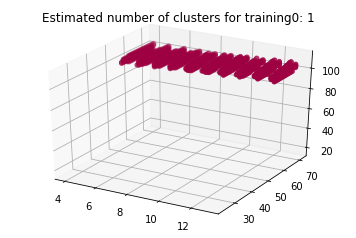

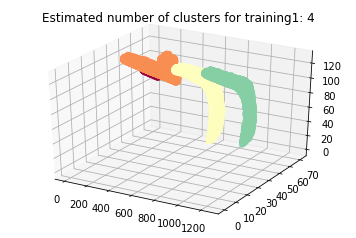

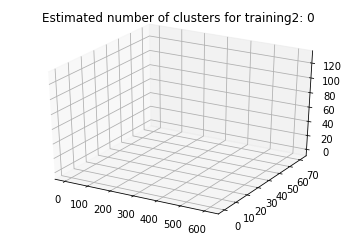

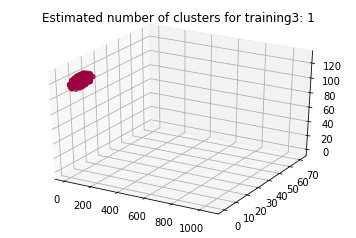

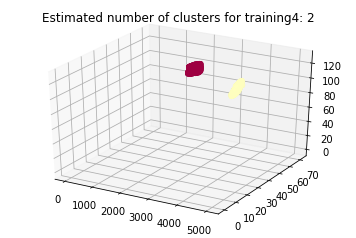

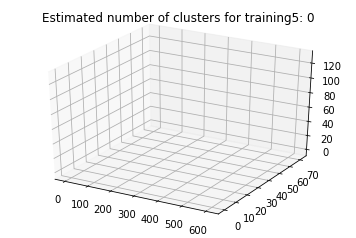

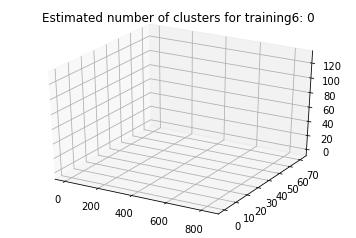

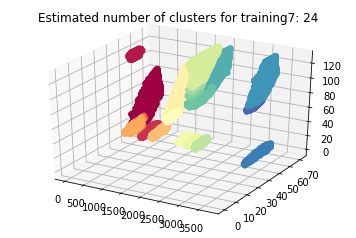

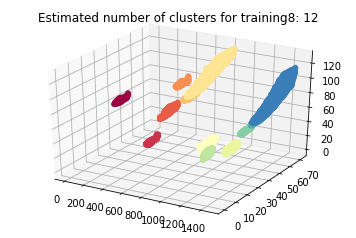

In [2]:
for j in range(9):
    data = pickle.load( open( 'data/numpy_arrays/training' + str(j) + '.npy', "rb" ) )
    db = DBSCAN(eps=6, min_samples=400).fit(data)
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Transparent used for noise.
            col = (0,0,0,0)

        class_member_mask = (labels == k)

        xy = data[class_member_mask & core_samples_mask]
        ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], 'o', c=col)

        xy = data[class_member_mask & ~core_samples_mask]
        ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], 'o', c=col)

    plt.title('Estimated number of clusters for training' + str(j) + ': %d' % n_clusters_)
    plt.show()